# &#x1F4DD; REPORT

# Homework &#x0031;&#xFE0F;&#x20E3; 

Homework policy: the homework is individual. Students are encouraged to discuss with fellow students to try to find the main structure of the solution for a problem, especially if they are totally stuck at the beginning of the problem. However, you should work out the details yourself and write down in your own words only what you understand yourself.


In this problem, we consider the roundtrip delay in a computer network (internet) between the computer we’re working on and another computer connected to the network. This roundtrip delay will be different, every time we send a message. As such, it can be modeled as a random variable y. For the design of network protocols and for their performance evaluation, it is important to know the distribution of this random roundtrip delay. To turn the estimation of the roundtrip delay distribution into a parameter estimation problem, we shall take a parametric distribution, parameterized by one or more parameters. Since we don’t have too much information about this variable y (except that it should be positive), we shall try several parametric distributions. In particular, we shall consider the following distributions:

$$
\text { * A Gaussian distribution: } \qquad f_G (y|\mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}  e^{-\frac{(y−\mu)^2}{2\sigma^2}} 
$$

$$
\text { * A Rayleigh distribution: } \qquad f_R (y|\sigma^2) = 
\begin{cases}
0 & , y < 0
\\
\frac{y}{\sigma^2}  e^{-\frac{y^2}{2\sigma^2}} & , y \geq 0
\end{cases}
$$

$$
\text { * An Erlang distribution: } \qquad f_{Em} (y|\lambda) = 
\begin{cases}
0 & , y < 0
\\
\frac{\lambda^{m+1}}{m!} y^me^{\lambda y} & , y \geq 0
\end{cases} 
\\
\text{ for different values of } m \in \{0,1,2\}.
\\
\\
\text{ Remark that for m = 0 we have an exponential density: }
\\
f_{E0}(y|\lambda) = 
\begin{cases}
0 & , y < 0
\\
\lambda e^{-\lambda y} & , y \geq 0
\end{cases}
$$

$$
\text{ * A (shifted) exponential density: } \qquad f_{exp}(y|\lambda,\alpha) = 
\begin{cases}
0 & , y < 0
\\
\lambda e^{-\lambda(y - \alpha)} & , y \geq 0
\end{cases}
$$

#### **&#x1F516;** **(&#x2170;)** Assume we collect n i.i.d. measurements $y_1, . . . , y_n$ that we can put into a vector $Y = [y_1, y_2, . . . , y_n]^T$ . For each of the parametric distributions $f_i(Y | \theta), i \in {G, R, E0, E1, E2, exp}$, determine the Maximum Likelihood estimate $\hat{\theta}_{ML,i}$ of the parameter(s) $\theta$ involved.

**&#x1F516;** Your raw data?

In [1]:
using DataFrames, CSV

In [2]:
df = CSV.File("stats.txt") |> DataFrame;

In [3]:
using PrettyTables

In [4]:
header = (
      ["pingstats"]
    , ["[Float64]"]
);

In [5]:
y = df[!,"pingstats"]; @show y[1:3];

y[1:3] = [158.991, 152.726, 152.736]


In [6]:
pretty_table(
    first(y, 3)
    , backend=Val(:html), header = header, standalone=true)

pingstats
[Float64]
158.991
152.726
152.736


In [7]:
using Statistics
using StatsPlots

In [8]:
# Global Operations and constants
∑ = sum
n = length(y) # Lenght of data used all along

100

In [9]:
using Markdown

---

#### &#x1F4DD; Gaussian Distribution

Given the probability density function (PDF) of a Gaussian (normal) distribution

$ f_G(y|\mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(y-\mu)^2}{2\sigma^2}} $

and a dataset $Y = \{y_1, y_2, \ldots, y_n\}$, we want to find the Maximum Likelihood Estimators (MLEs) for the parameters $\mu$ (mean) and $\sigma^2$ (variance).

### Finding $\mu$ and $\sigma^2$

The MLEs for $\mu$ and $\sigma^2$ are found by maximizing the log-likelihood function derived from the given PDF.

#### Log-Likelihood Function

The log-likelihood function for the Gaussian distribution, given $n$ data points, is:

$ L(\mu, \sigma^2 | Y) = -\frac{n}{2} \ln(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (y - \mu)^2 $

#### Maximizing the Log-Likelihood

To find the MLEs, we take the partial derivatives of $L(\mu, \sigma^2 | Y)$ with respect to $\mu$ and $\sigma^2$, set them to zero, and solve for $\mu$ and $\sigma^2$.

1. **For $\mu$:**

$ \frac{\partial L}{\partial \mu} = \frac{1}{\sigma^2} \sum_{i=1}^{n} (y - \mu) = 0 $

Solving this for $\mu$ gives:

$ \hat{\mu} = \frac{1}{n} \sum_{i=1}^{n} y $

This is the sample mean of the data.

2. **For $\sigma^2$:**

$ \frac{\partial L}{\partial \sigma^2} = -\frac{n}{2\sigma^2} + \frac{1}{2(\sigma^2)^2} \sum_{i=1}^{n} (y - \mu)^2 = 0 $

Solving for $\sigma^2$ gives:

$ \hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^{n} (y - \hat{\mu})^2 $

This is the sample variance of the data.

### Summary

- The MLE of $\mu$ ($\hat{\mu}$) is the sample mean.
- The MLE of $\sigma^2$ ($\hat{\sigma}^2$) is the sample variance (without Bessel's correction).

## &#x1F518; $\mu_G$=? ($\mu_G$)

In [10]:
Markdown.parse(raw"
#### &#x1F4DD; Estimated Gaussian Mean
```math
\hat{\mu}_G = \frac{1}{n} \sum_{i=1}^{n} y \qquad \{i: \in 1,\cdots,n\}
```
")

#### &#x1F4DD; Estimated Gaussian Mean

$$
\hat{\mu}_G = \frac{1}{n} \sum_{i=1}^{n} y \qquad \{i: \in 1,\cdots,n\}
$$


In [11]:
# Compute the mean by dividing the total sum by the number of data points
μ̂𝐺 = 1/n * ∑([yᵢ for yᵢ in y])

# Print the calculated mean
println("The estimated mean μ̂ of the dataset is: ", round(μ̂𝐺))

The estimated mean μ̂ of the dataset is: 180.0


## &#x1F518; $\sigma_G$=? ($\sigma_G^2$)

In [12]:
Markdown.parse(raw"
#### &#x1F4DD; Estimated Gaussian Variance
```math
\hat{\sigma}_G^2 = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{\mu}_G)^2 \qquad \{i: \in 1,\cdots,n\}
```
with Bessel's correction replace $\frac{1}{n}$ by $\frac{1}{n - 1}$
")

#### &#x1F4DD; Estimated Gaussian Variance

$$
\hat{\sigma}_G^2 = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{\mu}_G)^2 \qquad \{i: \in 1,\cdots,n\}
$$

with Bessel's correction replace $\frac{1}{n}$ by $\frac{1}{n - 1}$


In [13]:
# Calculate the variance (this is σ_G^2)
σ̂𝐺² = 1/n * ∑([(yᵢ - μ̂𝐺)^2 for yᵢ in y]) # or σ̂𝐺² = var(y, corrected=false) if using Statistics package

# Print the calculated variance
println("The calculated variance σ𝐺² of the dataset is: ", round(σ̂𝐺²))

The calculated variance σ𝐺² of the dataset is: 576.0


In [14]:
Markdown.parse(raw"
#### &#x1F4DD; Estimated Gaussian Standard Deviation
```math
\hat{\sigma}_G = \sqrt{\hat{\sigma}_G^2}
```
")

#### &#x1F4DD; Estimated Gaussian Standard Deviation

$$
\hat{\sigma}_G = \sqrt{\hat{\sigma}_G^2}
$$


In [15]:
# Calculate the standard deviation (\hat{\sigma}_G)
σ̂𝐺 = √(σ̂𝐺²)

println("calculated standard deviation σ̂𝐺 = ", round(σ̂𝐺))

calculated standard deviation σ̂𝐺 = 24.0


## &#x1F518; $L_G$ =?

In [16]:
Markdown.parse(raw"
#### &#x1F4DD; Gaussian Log-Likelihood
```math
\mathcal{L}_G(\mu_G, \sigma_G^2) = -\frac{n}{2} \log(2\pi\sigma_G^2) - \frac{1}{2\sigma_G^2} \sum_{i=1}^{n} (y_i - \mu_G)^2
```
")

#### &#x1F4DD; Gaussian Log-Likelihood

$$
\mathcal{L}_G(\mu_G, \sigma_G^2) = -\frac{n}{2} \log(2\pi\sigma_G^2) - \frac{1}{2\sigma_G^2} \sum_{i=1}^{n} (y_i - \mu_G)^2
$$


In [17]:
# Compute the log-likelihood 𝓛G 
𝓛𝐺 = -n/2 * log(2π * σ̂𝐺²) - 1/(2*σ̂𝐺²) * ∑((y .- μ̂𝐺).^2) # typed \bscrL

println("Log-likelihood 𝓛𝐺: ", round(𝓛𝐺))

Log-likelihood 𝓛𝐺: -460.0


---

#### &#x1F4DD; Rayleigh Distribution

Given the probability density function (PDF) of a Rayleigh distribution

$ f(y|\sigma^2) = \frac{y}{\sigma^2} e^{-\frac{y^2}{2\sigma^2}}, \quad y \geq 0 $

and a dataset $Y = \{y_1, y_2, ..., y_n\}$, to find the scale parameter $\sigma^2$, we use the method of Maximum Likelihood Estimation (MLE).

Step 1: Log-Likelihood Function

The first step is to write down the log-likelihood function based on the given PDF. For the Rayleigh distribution, the log-likelihood function $L_R(\sigma^2)$ for the dataset is:

$ L_R(\sigma^2) = \sum_{i=1}^{n} \ln\left(\frac{y}{\sigma^2}\right) - \frac{y^2}{2\sigma^2} $

Simplifying, we get:

$ L_R(\sigma^2) = \sum_{i=1}^{n} \ln(y) - n \ln(\sigma^2) - \frac{1}{2\sigma^2}\sum_{i=1}^{n} y^2 $

Step 2: Differentiate and Solve for $\sigma^2$

To find the MLE of $\sigma^2$, differentiate $L_R(\sigma^2)$ with respect to $\sigma^2$ and set the derivative to zero:

$ \frac{dL_R}{d\sigma^2} = -\frac{n}{\sigma^2} + \frac{1}{2(\sigma^2)^2}\sum_{i=1}^{n} y^2 = 0 $

Solving for $\sigma^2$, we find:

$ \hat{\sigma}^2 = \frac{1}{2n}\sum_{i=1}^{n} y^2 $

### Conclusion

The MLE for the scale parameter $\sigma^2$ of a Rayleigh distribution, given a set of observations $Y$, is the sum of the squared observations divided by twice the number of observations. This result directly provides the estimate of $\sigma^2$ from the data.

## &#x1F518; $\sigma_R$=? ($\sigma_R^2$)

In [18]:
Markdown.parse(raw"
#### &#x1F4DD; Estimated Rayleigh Variance
```math
\hat{\sigma}_R^2 = \frac{1}{2n} \sum_{i=1}^n y_i^2  \qquad \{i: \in 1,\cdots,n\}
```
")

#### &#x1F4DD; Estimated Rayleigh Variance

$$
\hat{\sigma}_R^2 = \frac{1}{2n} \sum_{i=1}^n y_i^2  \qquad \{i: \in 1,\cdots,n\}
$$


In [19]:
# Estimate sigma^2 (sigma squared) for Rayleigh distribution
σ̂𝑅² = 1/2n * ∑([yᵢ^2 for yᵢ in y]) # or ∑(y_i .^ 2) when squaring element-wise 

# Display the estimated parameter
println("Estimated parameter σ̂𝑅² = ", round(σ̂𝑅²));

Estimated parameter σ̂𝑅² = 16435.0


In [20]:
# Calculate the standard deviation (σ_R)
σ̂𝑅 = √(σ̂𝑅²)

println("calculated standard deviation σ̂𝑅 = ", round(σ̂𝑅))

calculated standard deviation σ̂𝑅 = 128.0


## &#x1F518; $L_R$ =?

In [21]:
Markdown.parse(raw"
#### &#x1F4DD; Rayleigh Log-Likelihood
```math
\ln \mathcal{L}_R(\sigma|Y) = \sum_{i=1}^{n} \ln(y_i) - n\ln(\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{n} y_i^2
```
")


#### &#x1F4DD; Rayleigh Log-Likelihood

$$
\ln \mathcal{L}_R(\sigma|Y) = \sum_{i=1}^{n} \ln(y_i) - n\ln(\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{n} y_i^2
$$


In [22]:
𝓛𝑅 = ∑(log.(y)) - n * log(σ̂𝑅²) - 1 / (2 * σ̂𝑅²) * ∑(y .^ 2) 
println("Log-likelihood 𝓛𝑅: ", round(𝓛𝑅))

Log-likelihood 𝓛𝑅: -552.0


---

## &#x1F518; $\lambda_{E0}$=? ($\lambda_{E0}$)

#### &#x1F4DD; Erlang distribution where $m = 0$

For $m = 0$, which aligns with an exponential distribution rather than the Erlang distribution, the probability density function (PDF) is given as:

$ f_{E0}(y|\lambda) = \lambda e^{-\lambda y}, \quad y \geq 0 $

To find the rate parameter $\lambda$ using a set of data $Y = \{y_1, y_2, ..., y_n\}$, you can use the method of Maximum Likelihood Estimation (MLE).

* Step 1: Write the Likelihood Function

The likelihood function for the exponential distribution, given the dataset $Y$, is:

$ \mathcal{L}(\lambda) = \prod_{i=1}^{n} \lambda e^{-\lambda y_i} = \lambda^n e^{-\lambda \sum_{i=1}^{n} y_i} $

* Step 2: Log-Likelihood Function

Taking the natural logarithm of the likelihood function gives the log-likelihood function:

$ \ln \mathcal{L}(\lambda) = n \ln(\lambda) - \lambda \sum_{i=1}^{n} y_i $

* Step 3: Differentiate and Solve for $\lambda$

Differentiating the log-likelihood function with respect to $\lambda$ gives:

$ \frac{d}{d\lambda} \ln \mathcal{L}(\lambda) = \frac{n}{\lambda} - \sum_{i=1}^{n} y_i $

Setting this derivative equal to zero and solving for $\lambda$ yields:

$ \hat{\lambda} = \frac{n}{\sum_{i=1}^{n} y_i} $

### Conclusion

The MLE of $\lambda$ for an exponential distribution, given a set of observations, is the number of observations $n$ divided by the sum of all observations. This provides a straightforward way to estimate $\lambda$ directly from your data.

In [23]:
Markdown.parse(raw"
#### &#x1F4DD; Estimating $\lambda_{E0}$ from data
```math
\hat{\lambda}_{E_0} = \frac{1}{\bar{y}} = \frac{n}{\sum_{i=1}^{n} y}  \qquad \{i: \in 1,\cdots,n\}
```
")

#### &#x1F4DD; Estimating $\lambda_{E0}$ from data

$$
\hat{\lambda}_{E_0} = \frac{1}{\bar{y}} = \frac{n}{\sum_{i=1}^{n} y}  \qquad \{i: \in 1,\cdots,n\}
$$


In [24]:
# Estimate λ for the exponential distribution
λ̂𝐸₀ = n / ∑([yᵢ for yᵢ in y])

println("Estimated rate parameter λ̂𝐸₀ = ", round(λ̂𝐸₀, digits = 3))

Estimated rate parameter λ̂𝐸₀ = 0.006


## &#x1F518; $L_{E0}$ =?

In [25]:
Markdown.parse(raw"
#### &#x1F4DD; Erlang Log-Likelihood when m = 0
```math
\ln \mathcal{L}(\lambda)_{E_0} = n \ln(\lambda) - \lambda \sum_{i=1}^{n} y
```
")


#### &#x1F4DD; Erlang Log-Likelihood when m = 0

$$
\ln \mathcal{L}(\lambda)_{E_0} = n \ln(\lambda) - \lambda \sum_{i=1}^{n} y
$$


In [26]:
𝓛𝐸₀ = n * log(λ̂𝐸₀) - λ̂𝐸₀ * ∑([yᵢ for yᵢ in y])
println("Log-likelihood 𝓛𝐸₀: ", round(𝓛𝐸₀))

Log-likelihood 𝓛𝐸₀: -619.0


---

## &#x1F518; $\lambda_{E1}$=? ($\lambda_{E1}$)

#### &#x1F4DD; Erlang distribution where $m = 1$

When $m = 1$, the Erlang distribution simplifies to the exponential distribution because the Erlang distribution is a general case of the gamma distribution for integer shape parameters, and the exponential distribution is a special case of the gamma distribution with a shape parameter of 1. The probability density function (PDF) for an exponential distribution with rate $\lambda$ is given by:

$ f(y|\lambda) = \lambda e^{-\lambda y}, \quad y \geq 0 $

To find the rate parameter $\lambda$ given a set of data $Y = \{y_1, y_2, ..., y_n\}$ from this distribution, you use the method of Maximum Likelihood Estimation (MLE).

* Step 1: Write the Likelihood Function

The likelihood function for the exponential distribution, given the dataset $Y$, is:

$ L(\lambda) = \prod_{i=1}^{n} \lambda e^{-\lambda y_i} = \lambda^n e^{-\lambda \sum_{i=1}^{n} y_i} $

* Step 2: Log-Likelihood Function

Taking the natural logarithm of the likelihood function gives the log-likelihood function:

$ \ln L(\lambda) = n \ln(\lambda) - \lambda \sum_{i=1}^{n} y_i $

* Step 3: Find the MLE of $\lambda$

Differentiate the log-likelihood function with respect to $\lambda$ and set it equal to zero to solve for $\lambda$:

$ \frac{d}{d\lambda} \ln L(\lambda) = \frac{n}{\lambda} - \sum_{i=1}^{n} y_i = 0 $

Solving for $\lambda$ gives:

$ \hat{\lambda} = \frac{n}{\sum_{i=1}^{n} y_i} $


In [27]:
Markdown.parse(raw"
#### &#x1F4DD; Estimated Lambda when m = 1
```math
\hat{\lambda}_{E_1} = \frac{n}{\sum_{i=1}^{n} y_i}
```
")

#### &#x1F4DD; Estimated Lambda when m = 1

$$
\hat{\lambda}_{E_1} = \frac{n}{\sum_{i=1}^{n} y_i}
$$


In [28]:
# Estimate λ for the erlang distribution when m = 1
λ̂𝐸₁ = n / ∑([yᵢ for yᵢ in y])

println("Estimated rate parameter λ̂𝐸₁ = ", round(λ̂𝐸₁, digits = 3))

Estimated rate parameter λ̂𝐸₁ = 0.006


## &#x1F518; $L_{E1}$ =?

In [29]:
Markdown.parse(raw"
#### &#x1F4DD; Erlang Log-Likelihood when m = 1
```math
\ln \mathcal{L}(\lambda)_{E_1} = n \ln(\lambda) - \lambda \sum_{i=1}^{n} y
```
")


#### &#x1F4DD; Erlang Log-Likelihood when m = 1

$$
\ln \mathcal{L}(\lambda)_{E_1} = n \ln(\lambda) - \lambda \sum_{i=1}^{n} y
$$


In [30]:
𝓛𝐸₁ = n * log(λ̂𝐸₁) - λ̂𝐸₁ * ∑([yᵢ for yᵢ in y])
println("Log-likelihood 𝓛𝐸1: ", round(𝓛𝐸₁))

Log-likelihood 𝓛𝐸1: -619.0


---

## &#x1F518; $\lambda_{E2}$=? ($\lambda_{E2})$

#### &#x1F4DD; Erlang distribution where $m = 2$

* Finding $\lambda$ when $m = 2$

To find the rate parameter $\lambda$ given a set of data $Y = \{y_1, y_2, ..., y_n\}$ from an Erlang distribution with $m=2$, you would again use the method of Maximum Likelihood Estimation (MLE), but the process involves the specific form of the PDF for $m=2$.

* Step 1: Likelihood Function

The likelihood function for the dataset is the product of the PDF values for each observation:

$ \mathcal{L}(\lambda) = \prod_{i=1}^{n} \frac{\lambda^2 y e^{-\lambda y}}{1!} $

* Step 2: Log-Likelihood Function

Taking the natural logarithm of the likelihood function gives the log-likelihood function:

$ \ln \mathcal{L}(\lambda) = \sum_{i=1}^{n} \ln(\lambda^2 y_i e^{-\lambda y}) = 2n \ln(\lambda) + \sum_{i=1}^{n} \ln(y) - \lambda \sum_{i=1}^{n} y $

* Step 3: Differentiate and Solve for $\lambda$

$ \frac{d}{d\lambda} \ln \mathcal{L}(\lambda) = \frac{d}{d\lambda} \left( 2n \ln(\lambda) - \lambda \sum_{i=1}^{n} y \right) $

$ = 2n \frac{1}{\lambda} - \sum_{i=1}^{n} y $

* Solve for $\lambda$

Setting the derivative equal to zero to find the critical points:

$ 2n \frac{1}{\lambda} - \sum_{i=1}^{n} y = 0 $

$ \Rightarrow 2n = \lambda \sum_{i=1}^{n} y $

$ \Rightarrow \lambda = \frac{2n}{\sum_{i=1}^{n} y} $

Thus, the MLE of $\lambda$ for the given Erlang distribution when $m=2$ is:

$ \hat{\lambda} = \frac{2n}{\sum_{i=1}^{n} y} $

This expression provides the estimate of $\lambda$ based on the dataset. It effectively doubles the reciprocal of the mean of the observations, which aligns with the intuition that for $m=2$, the rate $\lambda$ is estimated considering the process involves the sum of two exponential distributions (or equivalently, two "events" in the context of the Erlang distribution).

In [31]:
Markdown.parse(raw"
#### &#x1F4DD; Estimated Lambda when m = 2
```math
\hat{\lambda}_{E_2} = \frac{2n}{\sum_{i=1}^{n} y}
```
")

#### &#x1F4DD; Estimated Lambda when m = 2

$$
\hat{\lambda}_{E_2} = \frac{2n}{\sum_{i=1}^{n} y}
$$


In [32]:
# Estimate λ for the erlang distribution when m = 2
λ̂𝐸₂ = 2n / ∑([yᵢ for yᵢ in y])

println("Estimated rate parameter λ̂𝐸₂ = ", round(λ̂𝐸₂, digits = 3))

Estimated rate parameter λ̂𝐸₂ = 0.011


## &#x1F518; $L_{E2}$ =?

In [33]:
Markdown.parse(raw"
#### &#x1F4DD; Erlang Log-Likelihood when m = 2
```math
\ln \mathcal{L}(\lambda)_{E_2} = \sum_{i=1}^{n} \ln(\lambda^2 y e^{-\lambda y}) \qquad \{i: \in 1,\cdots,n\}
```
")


#### &#x1F4DD; Erlang Log-Likelihood when m = 2

$$
\ln \mathcal{L}(\lambda)_{E_2} = \sum_{i=1}^{n} \ln(\lambda^2 y e^{-\lambda y}) \qquad \{i: \in 1,\cdots,n\}
$$


In [34]:
𝓛𝐸₂ = ∑([log((λ̂𝐸₂)^2 * yᵢ * ℯ^(-(λ̂𝐸₂) * yᵢ)) for yᵢ in y])
println("Log-likelihood 𝓛𝐸₂: ", round(𝓛𝐸₂))

Log-likelihood 𝓛𝐸₂: -581.0


---

## &#x1F518;  $\lambda_{exp}$=? (shifted exponential distribution $\lambda_{exp}$)

- [ ] $\alpha_{exp}$=? ($\alpha_{exp}$)


#### &#x1F4DD; Shifted Exponential Recap

* The Shifted Exponential Distribution
$ f_{exp}(y|\lambda,\alpha) = 
\begin{cases}
0 & , y < \alpha \\
\lambda e^{-\lambda(y - \alpha)} & , y \geq \alpha
\end{cases} $

*  MLE for $\alpha$ and $\lambda$

1. **MLE for $\alpha$:** Given that the density starts at $\alpha$, and assuming the data are ordered such that $y_1 \leq y_2 \leq \ldots \leq y_n$, the MLE for $\alpha$ is the minimum of the dataset:
$ \hat{\alpha} = \min(Y) = y_1 $
This is because increasing $\alpha$ would decrease the likelihood of observing the lower values in the dataset, while decreasing $\alpha$ below the minimum value doesn't increase the likelihood due to the nature of the exponential function.

2. **MLE for $\lambda$:** After determining $\hat{\alpha}$, the dataset can be "shifted" so that the minimum value is treated as 0, adjusting the data by subtracting $\hat{\alpha}$ from each observation.

The likelihood function for the adjusted data then resembles that of a non-shifted exponential distribution. The MLE for $\lambda$, given the adjusted data, maximizes the likelihood or log-likelihood function:

$ L(\lambda) = n\ln(\lambda) - \lambda \sum_{i=1}^{n} (y_i - \hat{\alpha}) $

Taking the derivative with respect to $\lambda$ and setting it to zero gives:

$ \frac{d}{d\lambda} L(\lambda) = \frac{n}{\lambda} - \sum_{i=1}^{n} (y_i - \hat{\alpha}) = 0 $

Solving for $\lambda$ yields:

$ \hat{\lambda} = \frac{n}{\sum_{i=1}^{n} (y_i - \hat{\alpha})} $

This process and implementation correctly reflect the MLE for $\alpha$ and $\lambda$ for a shifted exponential distribution, providing a solid foundation for parameter estimation within this specific distributional context.

In [35]:
# Step 1: Estimate α (alpha_hat)
α̂ₑₓₚ = minimum(y);

# Step 2: Adjust the data
ỹₑₓₚ = y .-  α̂ₑₓₚ  # Y_adjusted or y\tilde

println("Estimated α (shift parameter): ", round(α̂ₑₓₚ))

Estimated α (shift parameter): 152.0


In [36]:
# MLE for λ (lambda_hat) from adjusted data
λ̂ₑₓₚ = n / ∑(ỹₑₓₚ); @show ỹₑₓₚ[1:3]

println("MLE for λ (rate parameter): ", round(λ̂ₑₓₚ, digits = 3))

ỹₑₓₚ[1:3] = [7.184000000000026, 0.9190000000000111, 0.929000000000002]
MLE for λ (rate parameter): 0.036


## &#x1F518;  $L_{exp}$ =?

In [37]:
Markdown.parse(raw"
#### &#x1F4DD; shifted exponential Log-Likelihood
```math
\ln \mathcal{L}(\lambda)_{exp} = n\ln(\lambda) - \lambda \sum_{i=1}^{n} (y_i - \hat{\alpha}) \qquad \{i: \in 1,\cdots,n\}
```
")


#### &#x1F4DD; shifted exponential Log-Likelihood

$$
\ln \mathcal{L}(\lambda)_{exp} = n\ln(\lambda) - \lambda \sum_{i=1}^{n} (y_i - \hat{\alpha}) \qquad \{i: \in 1,\cdots,n\}
$$


In [38]:
𝓛ₑₓₚ = n * log(λ̂ₑₓₚ) - λ̂ₑₓₚ * ∑([(yᵢ - α̂ₑₓₚ) for yᵢ in y])
println("Log-likelihood 𝓛ₑₓₚ: ", round(𝓛ₑₓₚ))

Log-likelihood 𝓛ₑₓₚ: -433.0


---

#### **&#x1F516;** **(&#x2171;)** Consider now also a shifted Rayleigh distribution:

$$
f_{SR} (y|\alpha,\sigma^2) = 
\left\{ 
\begin{array}{l}
0 & , y < 0\\
\frac{y - \alpha}{\sigma^2}  e^{-\frac{(y - \alpha)^2}{2\sigma^2}} & , y \geq 0
\end{array}
\right\}
=
\frac{y - \alpha}{\sigma^2}  e^{-\frac{(y - \alpha)^2}{2\sigma^2}}
1_{[\alpha, \infty]}(y)
$$

for some $\alpha \geq 0, \sigma^2 > 0$, and where we introduced the indicator function for a set A :

$$
1_A (y) =
\begin{cases}
0 & , y \notin  A\\
1 & , y \in     A
\end{cases}
$$


To determine the mean of $y$, denoted as $m_y$, for a shifted Rayleigh distribution with parameters $\alpha$ and $\sigma^2$, we start with the definition of the mean for a continuous probability distribution:

$ m_y = \int_{-\infty}^{\infty} y f(y|\alpha, \sigma^2) dy $

Given the PDF of the shifted Rayleigh distribution,

$ f_{SR}(y|\alpha, \sigma^2) = \frac{y - \alpha}{\sigma^2} e^{-\frac{(y - \alpha)^2}{2\sigma^2}} \mathbf{1}_{[\alpha, \infty]}(y) $

the mean can be calculated by integrating over the support of the distribution, which starts from $\alpha$ to $\infty$, because of the indicator function $\mathbf{1}_{[\alpha, \infty]}(y)$:

$ m_y = \int_{\alpha}^{\infty} y \frac{y - \alpha}{\sigma^2} e^{-\frac{(y - \alpha)^2}{2\sigma^2}} dy $

This integral doesn't have a straightforward solution because of its form, but we can reference the properties of the Rayleigh distribution and the effect of shifting on the mean. For an unshifted Rayleigh distribution with parameter $\sigma$, the mean is:

$ m = \sigma \sqrt{\frac{\pi}{2}} $

For the shifted distribution, the mean is shifted by $\alpha$, so:

$ m_y = \alpha + \sigma \sqrt{\frac{\pi}{2}} $

Here, we assume $\sigma^2$ in the original distribution refers to $\sigma^2$ as traditionally defined for a Rayleigh distribution, where $\sigma$ is the scale parameter. Hence, the mean of the shifted Rayleigh distribution as a function of $\alpha$ and $\sigma^2$ (where $\sigma$ is the square root of $\sigma^2$) is given by:

$ m_y = \alpha + \sqrt{\sigma^2} \sqrt{\frac{\pi}{2}} $

This formula provides a direct relationship between the mean of the distribution and its parameters, allowing for calculation of the mean given specific values of $\alpha$ and $\sigma^2$.

## &#x1F518;  $\sigma_{SR}$=? (shifted Rayleigh $\sigma_{SR}^2$)

## &#x1F518;  $\alpha_{SR}$=? ($\alpha_{SR}$)

## &#x1F518;  $L_{SR}$ =?

For the shifted Rayleigh distribution defined as

$ f_{SR}(y|\alpha, \sigma^2) = \frac{y - \alpha}{\sigma^2} e^{-\frac{(y - \alpha)^2}{2\sigma^2}} \mathbf{1}_{[\alpha, \infty]}(y) $

with parameters $\alpha \geq 0$ and $\sigma^2 > 0$, finding the Maximum Likelihood Estimators (MLEs) for $\alpha$ and $\sigma^2$ involves a slightly more complex process due to the presence of the shift parameter $\alpha$ and the squared term in the denominator.

### Likelihood Function

Given $n$ independent observations $Y = \{y_1, y_2, \ldots, y_n\}$, the likelihood function is

$ L(\alpha, \sigma^2 | Y) = \prod_{i=1}^{n} \left( \frac{y_i - \alpha}{\sigma^2} \right) e^{-\frac{(y_i - \alpha)^2}{2\sigma^2}} $

### Log-Likelihood Function

The log-likelihood function becomes

$ \ln L(\alpha, \sigma^2 | Y) = \sum_{i=1}^{n} \ln(y_i - \alpha) - n \ln(\sigma^2) - \sum_{i=1}^{n} \frac{(y_i - \alpha)^2}{2\sigma^2} $

### Differentiating and Solving for MLEs

The MLEs are found by differentiating the log-likelihood function with respect to $\alpha$ and $\sigma^2$ separately and setting each derivative equal to zero. However, due to the complexity of the expressions, especially with the shift parameter $\alpha$, closed-form solutions might not be straightforward and numerical optimization techniques are often required.

For illustrative purposes, here's an outline of the process without explicit solutions:

1. **Differentiate with respect to $\alpha$:** This would typically give you an equation involving $\alpha$ and $\sigma^2$, but finding $\hat{\alpha}$ directly from this step is complicated due to the dependency on $\sigma^2$.

2. **Differentiate with respect to $\sigma^2$:** This step provides another equation, which also involves both $\alpha$ and $\sigma^2$.

Given the difficulties in solving these equations analytically, applying numerical optimization methods like Newton-Raphson or gradient descent with initial guesses for $\alpha$ and $\sigma^2$ can be effective in finding the MLEs.

See Julia Code below

This example outlines the use of the `Optim` package to find MLEs for $\alpha$ and $\sigma^2$ through numerical optimization. Ensure to replace `data` with your actual dataset and adjust `initial_guess` as necessary.

In [39]:
Markdown.parse(raw"
#### &#x1F4DD; shifted Rayleigh Log-Likelihood
```math
\ln \mathcal{L}(\alpha, \sigma^2 | Y)_{SR} = \sum_{i=1}^{n} \ln(y_i - \alpha) - n \ln(\sigma^2) - \sum_{i=1}^{n} \frac{(y_i - \alpha)^2}{2\sigma^2}
```
")


#### &#x1F4DD; shifted Rayleigh Log-Likelihood

$$
\ln \mathcal{L}(\alpha, \sigma^2 | Y)_{SR} = \sum_{i=1}^{n} \ln(y_i - \alpha) - n \ln(\sigma^2) - \sum_{i=1}^{n} \frac{(y_i - \alpha)^2}{2\sigma^2}
$$


In [40]:
using Optim

In [41]:
# Define the negative log-likelihood function
function neg_log_likelihood(params, yᵢ)
    α, σ² = params
    # Ensure data - α is always positive
    ỹᵢ = yᵢ .- α # adjusted_data
    # Filter or adjust values that would lead to log of negative numbers
    ỹᵢ = map(x -> max(x, 1e-10), ỹᵢ)  # Replace 1e-10 with a small positive value
    return -∑(log.(ỹᵢ) .- log(σ²) .- ((ỹᵢ).^2 / (2σ²)))
end

neg_log_likelihood (generic function with 1 method)

In [42]:
# Initial guesses for α and σ²
initial_guess = [1.0, 1.0]

# Use a numerical optimization package to minimize the negative log-likelihood
result = optimize(params -> neg_log_likelihood(params, y), initial_guess)

# Extract the estimated parameters
α̂ₛᵣ, σ̂ₛᵣ² = Optim.minimizer(result)

println("Estimated α̂ₛᵣ: ", α̂ₛᵣ)
println("Estimated σ̂ₛᵣ²: ", σ̂ₛᵣ²)
println("Estimated σ̂ₛᵣ: ", √σ̂ₛᵣ²)

Estimated α̂ₛᵣ: 137.56008000761443
Estimated σ̂ₛᵣ²: 1176.0299107695298
Estimated σ̂ₛᵣ: 34.293292504067466


#### &#x1F516; **(&#x2172;)**  In Matlab, you will generate n = 100 measurements of the roundtrip delay between your PC and a host machine of your choice

See [REPORT_ping](REPORT_ping.ipynb)

#### &#x1F516; **(&#x2173;)**  In Matlab, plot a histogram of the measurements {y1, . . . , yn} you made and in the same plot superimpose the graphs for the marginal densities $f (y|\hat{\theta}_{ML,i} (Y )), i \in \{G, R, E0, E1, E2, exp,SR \}$. Make this plot for y going from a value that is somewhat smaller than the $y_{min}$ you measured to a value that is somewhat bigger than the $y_{max}$ you measured. In Matlab, use the histogram command with the options ’Normalization’ and ’probability’, so that the histogram can be compared directly to the pdf of the distributions.

#### &#x1F4CA; Plot

In [43]:
using Plots
using Distributions
using StatsPlots  # For the `plot` function for distributions

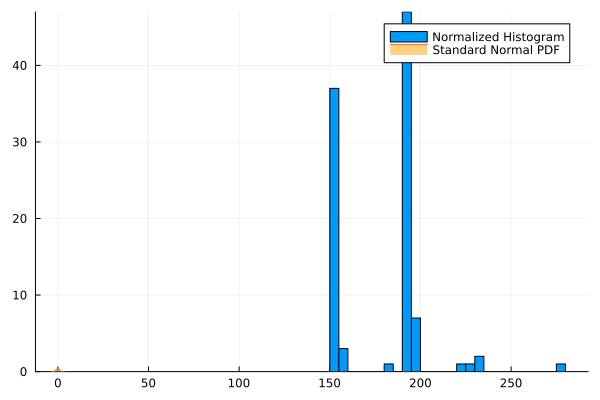

In [44]:
# Sample data: Replace `data` with your dataset
data = randn(1000)  # Example: 1000 random numbers from a standard normal distribution

# Create a normalized histogram
histogram(y, normalization=:probability, bins=30, label="Normalized Histogram")

# To compare with a PDF, overlay the PDF on the same plot
# For example, overlaying a standard normal PDF
plot!(Normal(0, 1), fill=(0, .5,:orange), label="Standard Normal PDF")

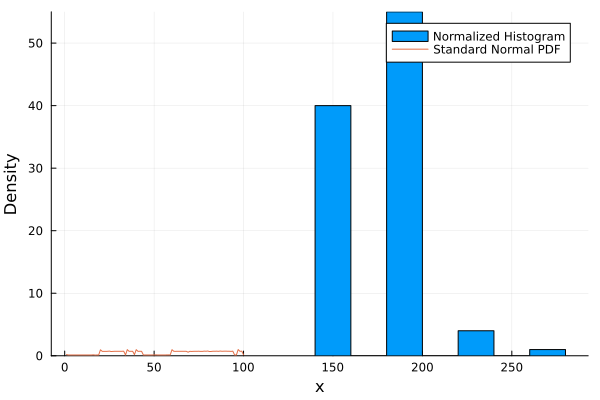

In [45]:
# Create a normalized histogram
histogram(y
    # , normalization=:probability
    , label="Normalized Histogram"
)

# To compare with a PDF, overlay the PDF on the same plot
# For example, overlaying a standard normal PDF
# plot!(Normal(0, 1), fill=(0, .5,:orange), label="Standard Normal PDF")

dist = Normal(μ̂𝐺, σ̂𝐺)

# Define a range of values over which to plot the PDF
x = 0:10:n  # Adjust the range and step as needed

# Calculate the PDF for each y value
pdf_values = cdf.(dist, y)

# Plot the PDF
plot!(pdf_values, label="Standard Normal PDF", xlabel="x", ylabel="Density")

To plot the marginal density of a shifted exponential distribution, we'll assume you're interested in visualizing the probability density function (PDF) after estimating its parameters ($\lambda$ and $\alpha$) from the data. Given the PDF of a shifted exponential distribution:

$ f_{exp}(y|\lambda,\alpha) = 
\begin{cases}
0 & , y < \alpha \\
\lambda e^{-\lambda(y - \alpha)} & , y \geq \alpha
\end{cases} $


y_values = 151.807:1.0:275.807
pdf_values[1:3] = [0.03584654666915679, 0.0345843299727474, 0.033366558031460415]


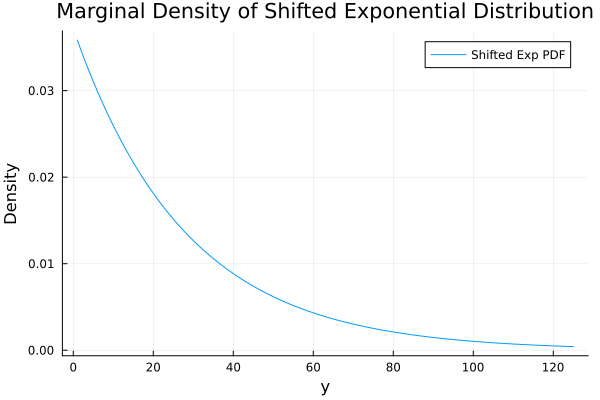

In [46]:
# Define the shifted exponential PDF function
function shifted_exp_pdf(y, λ, α)
    y .< α && return 0.0  # Return 0 for y < α
    return λ * exp(-λ * (y - α))
end

# Generate values for y (adjust the range and step as needed)
y_values = α̂ₑₓₚ:1.0:maximum(y); @show y_values   # Adjust upper limit as needed

# Calculate the PDF values
# pdf_values = [shifted_exp_pdf(yᵢ, λ̂ₑₓₚ, α̂ₑₓₚ) for yᵢ in y]; @show pdf_values[1:3]
pdf_values = [shifted_exp_pdf(yᵢ, λ̂ₑₓₚ, α̂ₑₓₚ) for yᵢ in y_values]; @show pdf_values[1:3]

# Plot the PDF
# plot(y_values, pdf_values, label="Shifted Exp PDF", xlabel="y", ylabel="Density", title="Marginal Density of Shifted Exponential Distribution")
pl1 = plot(pdf_values, label="Shifted Exp PDF"
    , xlabel="y", ylabel="Density"
    , title="Marginal Density of Shifted Exponential Distribution"
)
plot(pl1)

In [47]:
# Define the PDF of the shifted Rayleigh distribution
function shifted_rayleigh_pdf(y, α, σ²)
    if y < α
        return 0
    else
        return (y - α) / σ² * exp(-((y - α)^2) / (2σ²))
    end
end

shifted_rayleigh_pdf (generic function with 1 method)

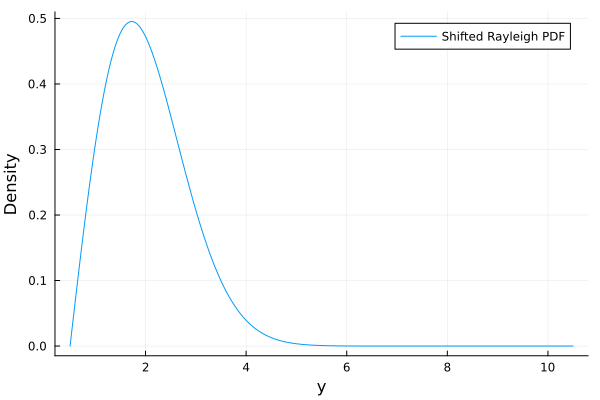

In [48]:

# Parameters for the shifted Rayleigh distribution
α = 0.5  # Example value, adjust based on your data or estimation
σ² = 1.5  # Example value, adjust based on your data or estimation

# Generate values for y from α to an upper limit, with a step size
y_values = α:0.01:α+10  # Adjust the upper limit and step size as needed

# Calculate the PDF values
pdf_values = [shifted_rayleigh_pdf(y, α, σ²) for y in y_values]

# Plot the PDF
plot(y_values, pdf_values, label="Shifted Rayleigh PDF", xlabel="y", ylabel="Density")


In [49]:
using Plots, Distributions, StatsPlots

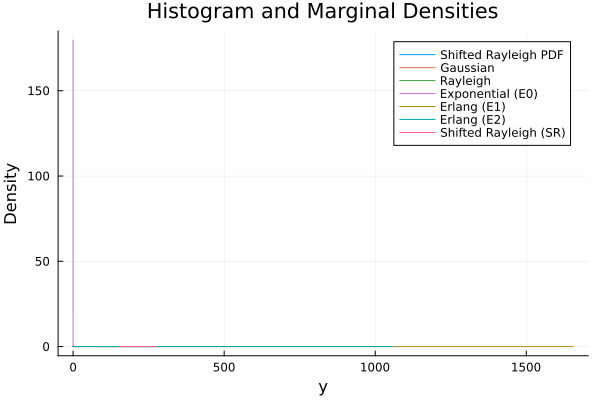

In [50]:


# Sample dataset Y
# Y = randn(100) .* 2 .+ 3  # Example: 100 measurements from a Gaussian distribution, adjust as necessary
Y = y

# Histogram of the dataset
# histogram(Y, bins=30, normalization=:pdf, label="Data Histogram", alpha=0.5)

# Superimpose the Gaussian (G) density
μ_G, σ²_G = mean(Y), var(Y)
plot!(Normal(μ_G, sqrt(σ²_G)), label="Gaussian")

# Superimpose the Rayleigh (R) density
σ_R = sqrt(mean(Y .^ 2) / 2)
plot!(Rayleigh(σ_R), label="Rayleigh")

# Superimpose the Exponential (E0) density
λ_E0 = 1 / mean(Y)
plot!(Exponential(λ_E0), label="Exponential (E0)")

# Superimpose the Erlang (E1, E2) densities
λ_E1 = 1 / mean(Y)  # Same as E0 for m=1
plot!(Gamma(1, 1/λ_E1), label="Erlang (E1)")

λ_E2 = 2 / mean(Y)  # Adjust for m=2, assuming mean(Y) adjustment
plot!(Gamma(2, 1/λ_E2), label="Erlang (E2)")

# Superimpose the Shifted Rayleigh (SR) density - manual definition required
α_SR = minimum(Y)  # Estimate or choose α
σ²_SR = var(Y)  # Estimate or choose σ²
y_vals = range(α_SR, maximum(Y) + 1, 200)
sr_pdf = [(y - α_SR) / σ²_SR * exp(-((y - α_SR)^2) / (2σ²_SR)) for y in y_vals]
plot!(y_vals, sr_pdf, label="Shifted Rayleigh (SR)")

# Display the plot
xlabel!("y")
ylabel!("Density")
title!("Histogram and Marginal Densities")
